# Histogram 
- Bir görüntünün histogramı, her bir yoğunluk değerinin piksel miktarının grafiksel bir temsilidir.
- 0 da (saf siyah) 255 e (saf beyaz) 
- Histogramlar görüntüleri eşiklendirmek(tresholding) için kullanılabilir.

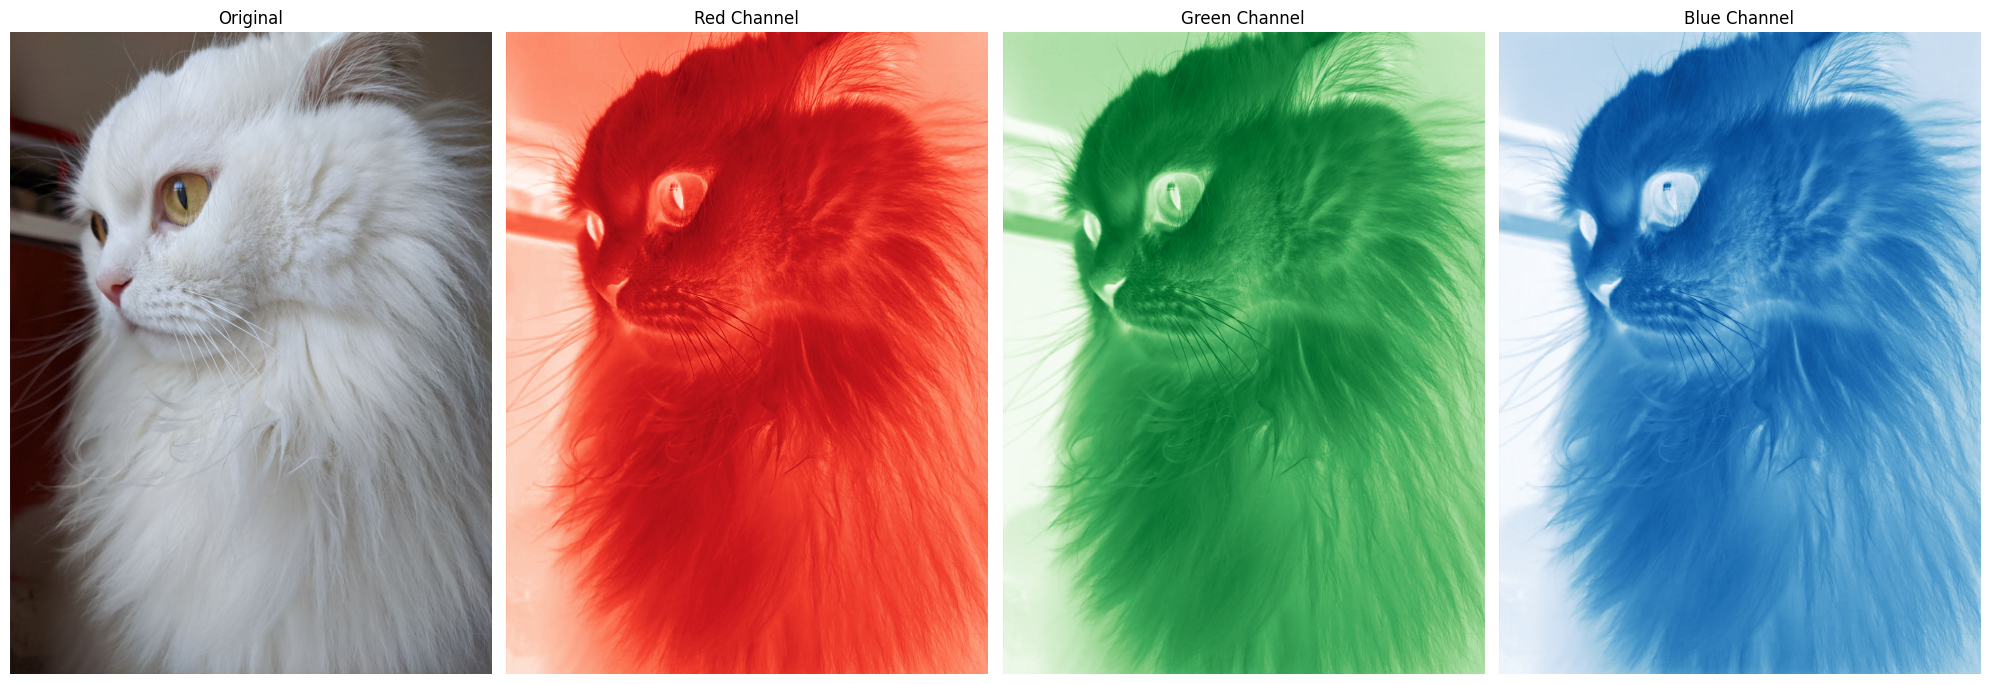

In [4]:
import matplotlib.pyplot as plt
import numpy as np

bulut = plt.imread('bulut.jpeg')

red = bulut[:, :, 0]
green = bulut[:, :, 1]
blue = bulut[:, :, 2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.imshow(bulut)
ax1.set_title('Original'), ax1.axis('off')
ax2.imshow(red, cmap='Reds')
ax2.set_title('Red Channel'), ax2.axis('off')
ax3.imshow(green, cmap='Greens')
ax3.set_title('Green Channel'), ax3.axis('off')
ax4.imshow(blue, cmap='Blues')
ax4.set_title('Blue Channel'), ax4.axis('off')
plt.tight_layout()
plt.show()


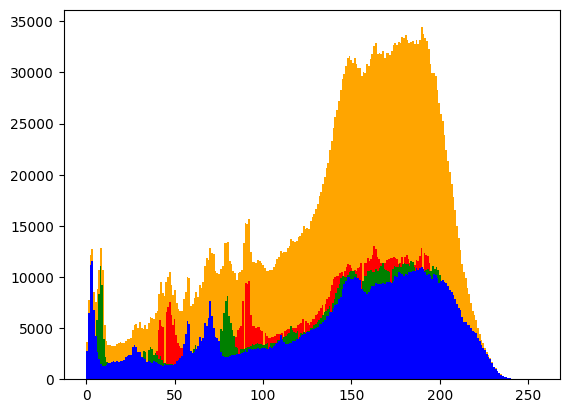

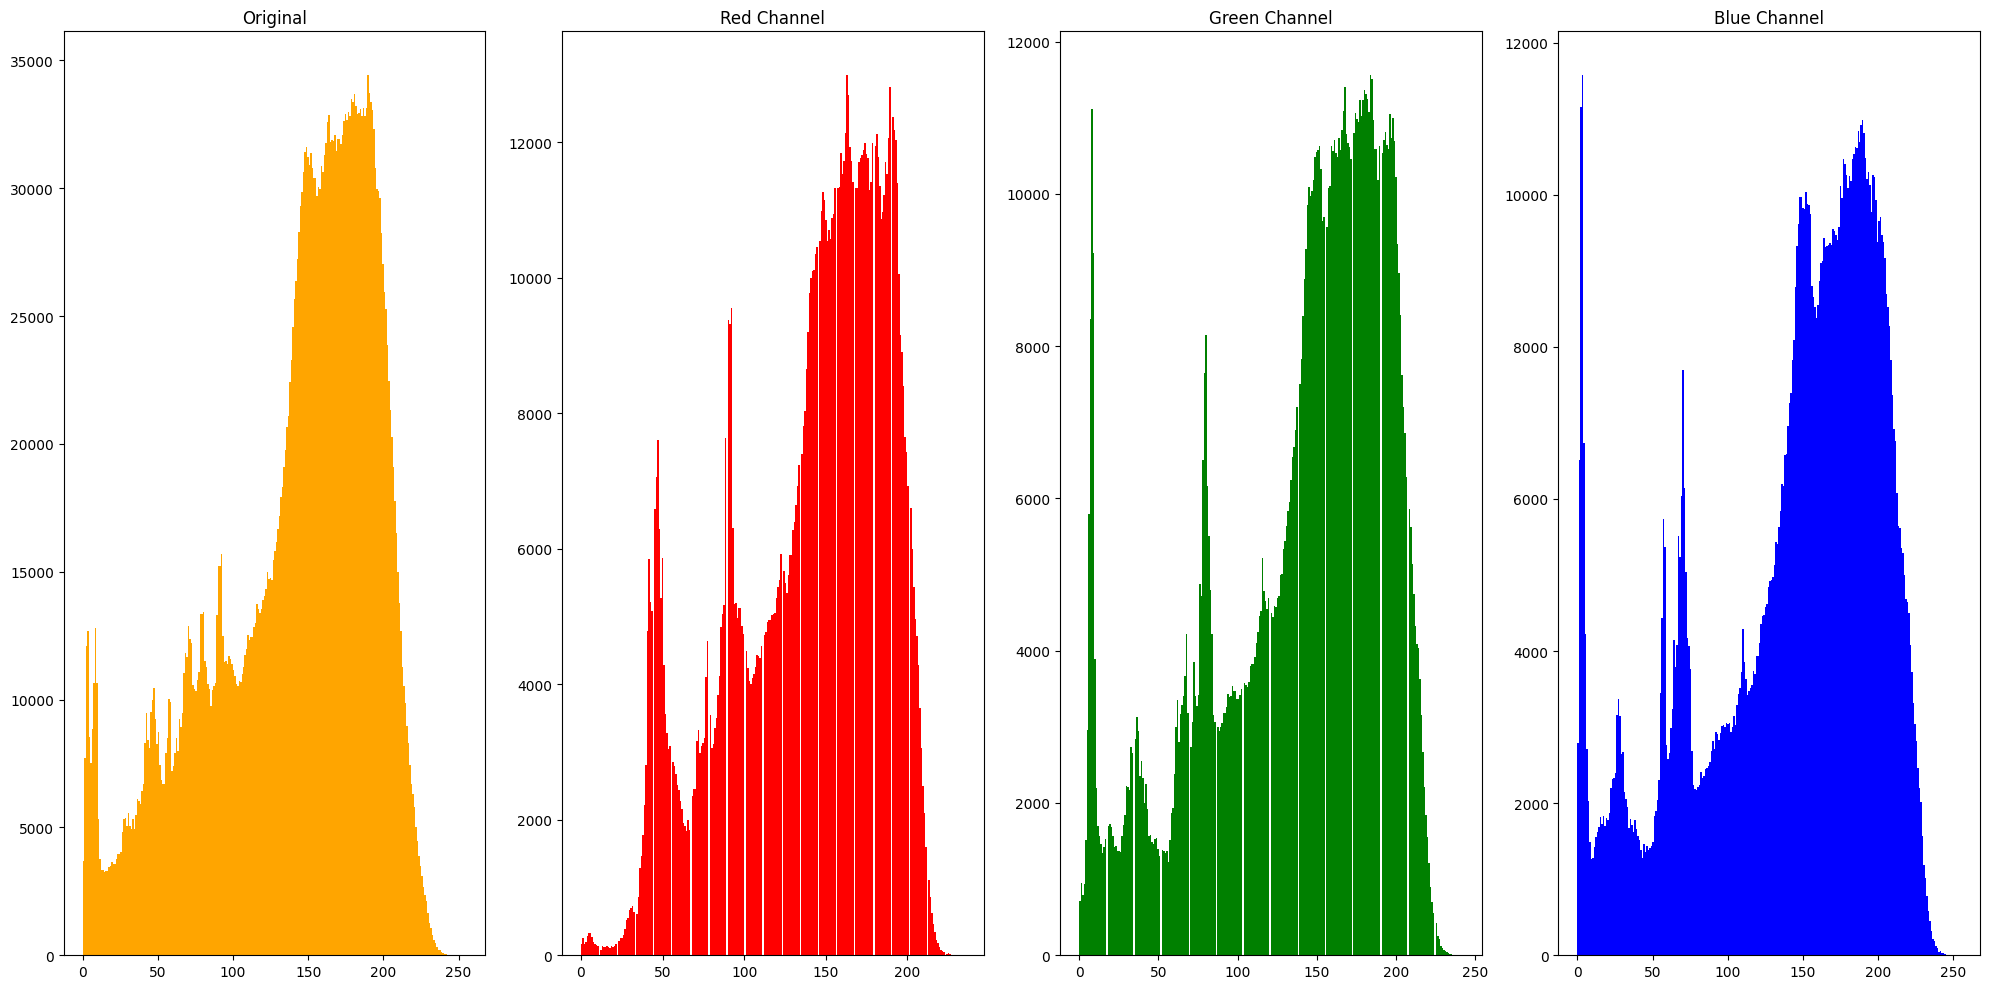

In [5]:
# Histogram oluşturma
plt.hist(bulut.ravel(), bins=256, color='orange')
plt.hist(red.ravel(), bins=256, color='red')
plt.hist(green.ravel(), bins=256, color='green')
plt.hist(blue.ravel(), bins=256, color='blue')

# Histogramları subplot ile gösterme
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.hist(bulut.ravel(), bins=256, color='orange')
ax1.set_title('Original'), 
ax2.hist(red.ravel(), bins=256, color='red')
ax2.set_title('Red Channel')
ax3.hist(green.ravel(), bins=256, color='green')
ax3.set_title('Green Channel')
ax4.hist(blue.ravel(), bins=256, color='blue')
ax4.set_title('Blue Channel')
plt.tight_layout()
plt.show()

# Thresholding
- Partitioning an image into foreground and background, simplest way to segment an image
- By making it black and white
- Her Pixel için bir eşik değeri belirlenir.
    - Eğer pixel değeri eşik değerinden büyükse beyaz
    - Pixel değeri eşik değerinden küçükse siyah 
- Only works for grayscale images

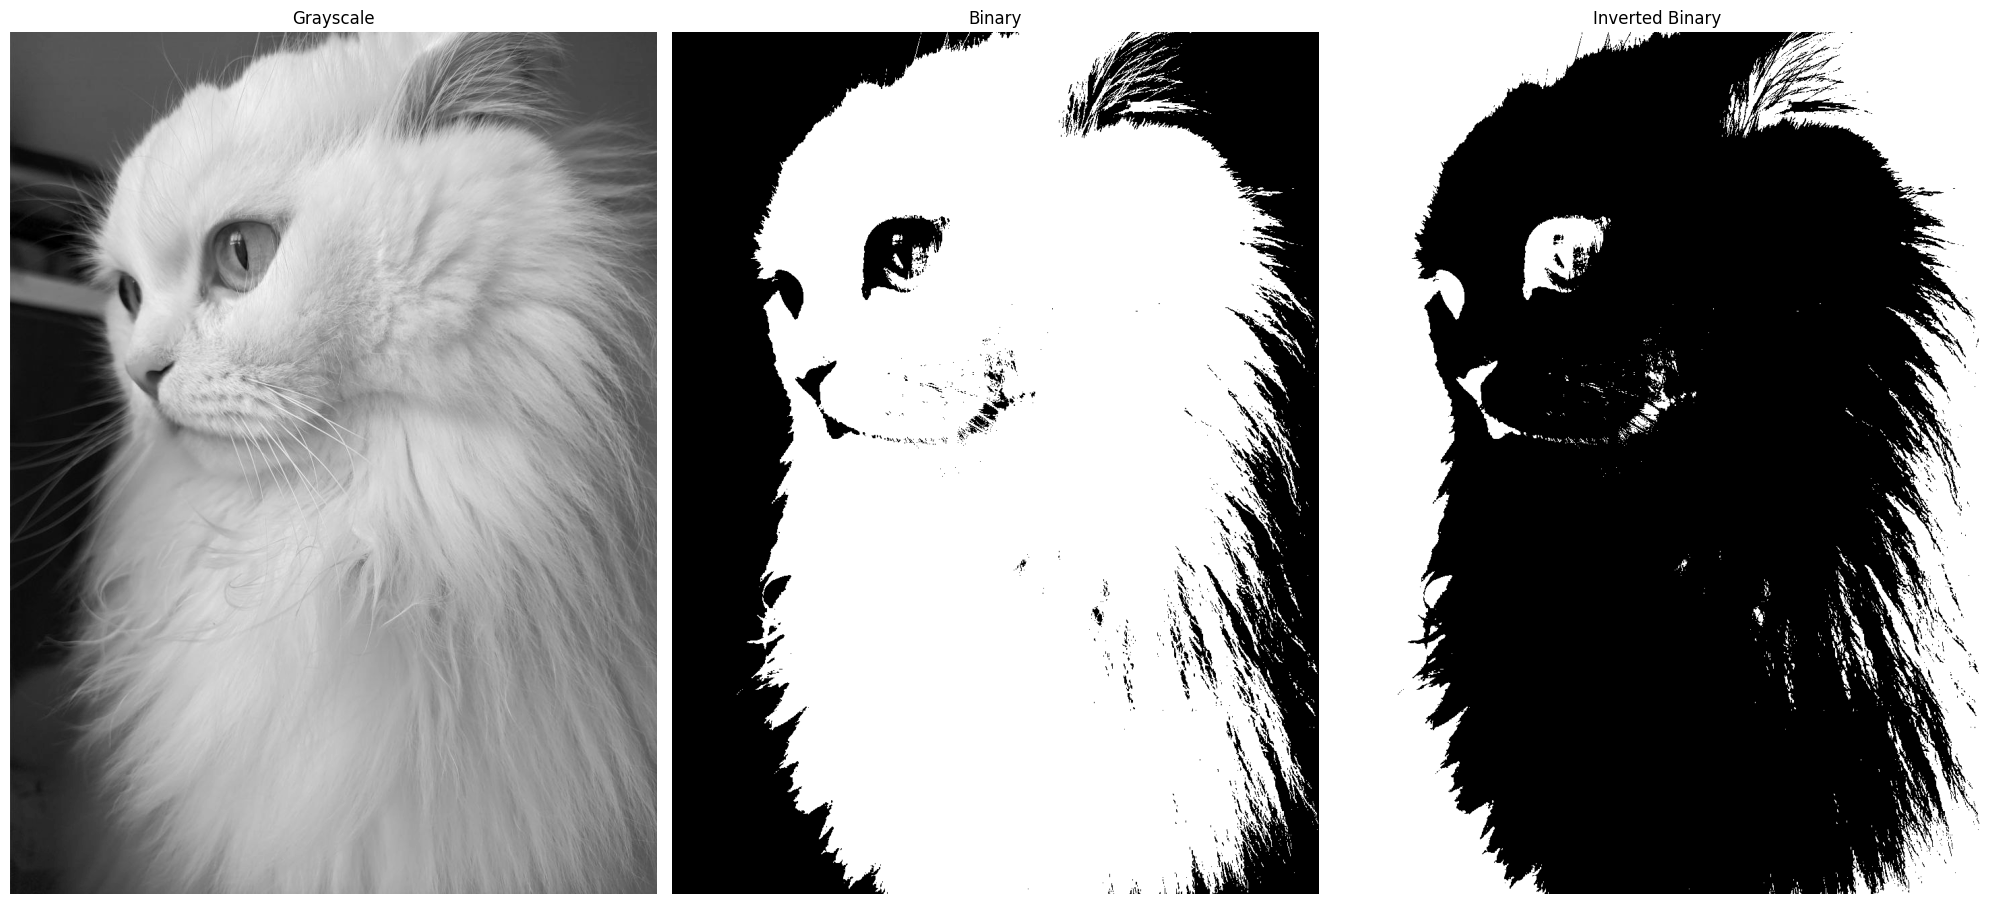

In [6]:
from skimage import color
# grayscale bulut 
grayscale_bulut = color.rgb2gray(bulut)

thresh = 0.5
binary = grayscale_bulut > thresh

# Inverted thresholding
thresh = 0.5
inverted_binary = grayscale_bulut <= thresh

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(grayscale_bulut, cmap='gray')
ax1.set_title('Grayscale'), ax1.axis('off')
ax2.imshow(binary, cmap='gray')
ax2.set_title('Binary'), ax2.axis('off')
ax3.imshow(inverted_binary, cmap='gray')
ax3.set_title('Inverted Binary'), ax3.axis('off')
plt.tight_layout()
plt.show()

## Thresholding Categories
- Global or histogram based : good for uniform backgrounds 
- Local or adaptive : for uneven background illumination
- Local eşikleme genel eşiklemeye göre daha iyi sonuçlar verse de daha yavaştır.
- Bir görüntünün arka planı tektipse global eşikleme daha iyi sonuçlar verir.
- Görüntü yüksek kontrasta sahip değilse veya arka olan düzgün değilse, yerel eşikleme daha iyi sonuçlar verir.

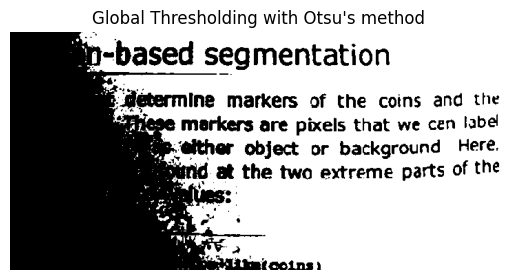

In [15]:
image = plt.imread('text_page.jpg')
image_gray = color.rgb2gray(image)
# Global thresholding
# Optimal thresholding with Otsu's method
from skimage.filters import threshold_otsu
thresh = threshold_otsu(image_gray)
binary = image_gray > thresh
plt.imshow(binary, cmap='gray'), plt.axis('off'), plt.axis('off')
plt.title('Global Thresholding with Otsu\'s method')
plt.show()

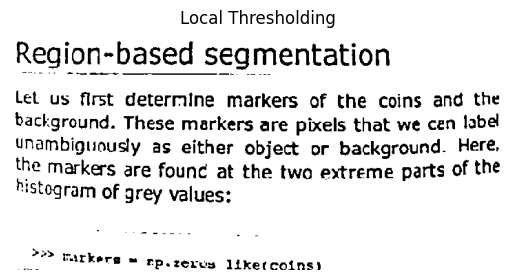

In [17]:
# Local thresholding 
from skimage.filters import threshold_local
# her pikseli çevreleyen 35x35 piksel bloğunun ortalamasını alarak eşik değerini hesapla
block_size = 35
# offset değeri, eşik değerinin hesaplanmasındakullanılır blok ortalamasından çıkarılır
local_thresh = threshold_local(image_gray, block_size, offset=0.08)

binary_local = image_gray > local_thresh
plt.imshow(binary_local, cmap='gray'), plt.axis('off'), plt.axis('off')
plt.title('Local Thresholding')
plt.show()

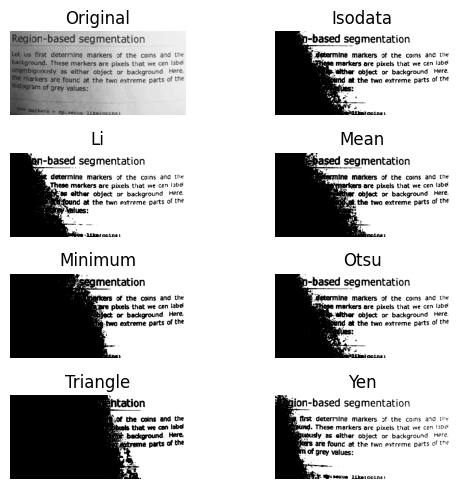

(None, None)

In [22]:
# All thresholding methods
from skimage.filters import try_all_threshold
# tüm thresholding yöntemlerini deneme
fig, ax = try_all_threshold(image_gray, verbose=False)
plt.tight_layout(), plt.show(fig, ax)